In [1]:
# Dependencies
import numpy as np

import pandas as pd
import datetime as dt
    
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
    
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

# D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June
june_temp = []
june_temp = session.query(Measurement).filter(func.extract('month',Measurement.date) == 6)
june_temp

# June Temperatures

In [5]:
#  3. Convert the June temperatures to a list
june_list = [temp.tobs for temp in june_temp]
print(june_list)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June
june_df = pd.DataFrame(june_list)
june_df

,0
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame
june_df.rename(columns={0: "June Temperatures (deg F)"}).describe()

,June Temperatures (deg F)
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

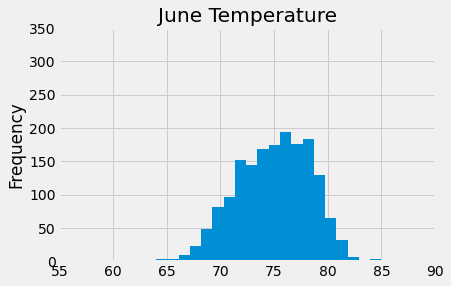

In [8]:
# Create June temperature data frame and plot spread
june_df.plot.hist(bins=20, legend=False)
plt.title("June Temperature")
plt.xlim(55,90)
plt.ylim(0,350)
plt.tight_layout

# June Precipitations

In [9]:
# Convert the June precipitation data to a list.
june_prcp_list = [prcp.prcp for prcp in june_temp]
print(june_prcp_list)

[0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.07, 0.0, 0.56, 0.89, 0.0, 0.0, 0.0, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.06, 0.07, None, 0.0, 0.0, 0.01, 0.01, 0.0, 0.02, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, None, None, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.15, 0.01, 0.0, 0.05, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.37, 0.0, 0.0, 0.0, 0.01, 0.0, 0.04, 0.12, 0.04, 0.02, 0.35, 0.03, 0.01, 0.0, 0.0, 0.03, 0.01, 0.0, 0.66, 0.01, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.03, 0.15, 0.01, 0.07, 0.01, 0.01, 0.19, 0.0, 0.05, 0.06, 0.04, 0.0, 0.01, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.01, 0.04, 0.0, 0.0, 0.03, 0.03, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.01, 0.05, 0.0, 0.01,

In [10]:
# Create June Precipitation data frame
june_prcp_df = pd.DataFrame(june_prcp_list)
june_prcp_df

,0
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [11]:
# Summary statistics for the June Precipitation DataFrame.
june_prcp_df.rename(columns={0: "June Precipitation (inches)"}).describe()

,June Precipitation (inches)
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


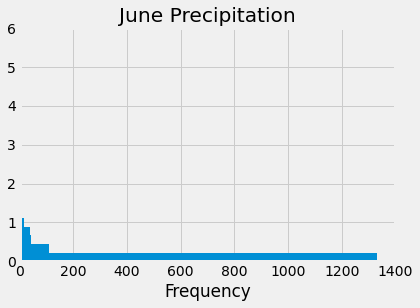

In [12]:
# Plot June precipitation spread
june_prcp_df.plot.hist(bins=20, orientation="horizontal", legend=False)
plt.title("June Precipitation")
plt.xlim(0,1400)
plt.ylim(0,6)
plt.tight_layout
plt.show()

# D2: Determine the Summary Statistics for December

In [13]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December
december_temp = []
december_temp = session.query(Measurement).filter(func.extract('month',Measurement.date) == 12)

# December Temperatures

In [14]:
# 7. Convert the December temperatures to a list
december_list = [temp.tobs for temp in december_temp]
print(december_list)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [15]:
# 8. Create a DataFrame from the list of temperatures for the month of December
december_df = pd.DataFrame(december_list)
december_df

,0
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [16]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame
december_df.rename(columns={0: "December Temperatures (deg F)"}).describe()

,December Temperatures (deg F)
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

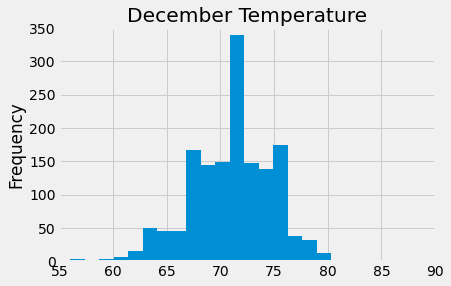

In [17]:
# Create December temperature data frame and plot spread
december_df.plot.hist(bins=20, legend=False)
plt.title("December Temperature")
plt.xlim(55,90)
plt.ylim(0,350)
plt.tight_layout

# December Precipitations

In [18]:
# Convert the December precipitation data to a list.
december_prcp_list = [prcp.prcp for prcp in december_temp]
print(december_prcp_list)

[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.58, 0.77, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4, 0.0, 0.0, None, 0.13, 0.55, 0.06, 0.01, 0.0, 0.03, 0.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13, 0.07, 0.07, 0.08, 0.4, 0.7, 0.0, 0.01, 0.07, 0.02, 0.15, 0.02, 0.18, 0.03, 0.04, 0.1, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.2, 0.01, None, None, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14, 0.09, 0.01, 0.02, 0.02, 0.12, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.04, 0.0, 2.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.02, 0.0, 0.0, 1.1, 0.02, 0.0, 0.16, 0.09, 0.02, 0.0, 0.0, 0.05, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.15, 0.09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.01, 0.0, 0.03, 0.02, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.93, 0.04, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.06, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06, 0.0, 0.39, 0.0, 0.0, 0.08, 0.0, 0.02, 0.08, 0.13, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 0.02, 0.43, 0.01, 0.0, 0.0, 0.0, 0.12, 0.03, 0.0, 0.03, 0.43, 0.02

In [19]:
# Create December Precipitation data frame
december_prcp_df = pd.DataFrame(december_prcp_list)
december_prcp_df

,0
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


In [20]:
# Calculate and print out the summary statistics for the December Precipitation DataFrame.
december_prcp_df.rename(columns={0: "December Precipitation (inches)"}).describe()

,December Precipitation (inches)
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


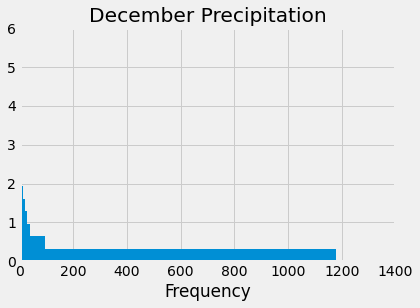

In [21]:
# Plot December precipitation spread
december_prcp_df.plot.hist(bins=20, orientation="horizontal", legend=False)
plt.title("December Precipitation")
plt.xlim(0,1400)
plt.ylim(0,6)
plt.tight_layout
plt.show()